<a href="https://colab.research.google.com/github/abbasKareem/Tesnorflow-project-food-classification/blob/master/05_transfer_learning_part2_fine_tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Helper Function



In [1]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2021-09-29 16:37:06--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2021-09-29 16:37:06 (63.7 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [2]:
from helper_functions import create_tensorboard_callback, unzip_data, walk_through_dir, plot_loss_curves

##Let's get some data

In [3]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

unzip_data('10_food_classes_10_percent.zip')

--2021-09-29 16:37:09--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.74.128, 173.194.192.128, 209.85.145.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.74.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   147MB/s    in 1.1s    

2021-09-29 16:37:10 (147 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [4]:
walk_through_dir('10_food_classes_10_percent')

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/train'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/fried_rice'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ice_cream'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/sushi'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/steak'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/hamburger'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ramen'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_wings'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/grilled_salmon'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_curry'.
There are 0 directories and 75 images in '10_food_classes_10_percent

In [5]:
train_dir = '10_food_classes_10_percent/train'
test_dir = '10_food_classes_10_percent/test'

In [6]:
import tensorflow as tf

IMG_SIZE = (224, 224)
BATCH_SIZE = 32
train_data_10_precent = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                            image_size=IMG_SIZE,
                                                                            label_mode='categorical',
                                                                            batch_size=BATCH_SIZE)

test_data = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                image_size=IMG_SIZE,
                                                                label_mode='categorical',
                                                                batch_size=BATCH_SIZE)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [7]:
train_data_10_precent

<BatchDataset shapes: ((None, 224, 224, 3), (None, 10)), types: (tf.float32, tf.float32)>

In [8]:
train_data_10_precent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [9]:
# See an example of a batch of data
for images, labels in train_data_10_precent.take(1):
  print(images, labels)

tf.Tensor(
[[[[1.53974487e+02 1.25571426e+02 9.77295914e+01]
   [1.49193878e+02 1.21596931e+02 9.56734695e+01]
   [1.34484695e+02 1.08066322e+02 8.42193909e+01]
   ...
   [2.07300980e+02 1.23724365e+02 8.72294846e+01]
   [2.02515289e+02 1.13204063e+02 7.87550735e+01]
   [1.99581619e+02 1.11857216e+02 7.64540863e+01]]

  [[9.40204010e+01 6.56887741e+01 5.11887741e+01]
   [9.10918350e+01 6.31581573e+01 5.06479568e+01]
   [8.27448883e+01 5.57448921e+01 4.43163223e+01]
   ...
   [2.01994751e+02 1.22652824e+02 8.93518295e+01]
   [1.79734665e+02 9.46632385e+01 6.35101776e+01]
   [1.76877502e+02 9.25204315e+01 6.09693756e+01]]

  [[5.99336739e+01 3.23622437e+01 3.22193871e+01]
   [6.30867348e+01 3.71734695e+01 3.70306129e+01]
   [6.05204048e+01 3.47346916e+01 3.61632614e+01]
   ...
   [1.81030350e+02 1.02887360e+02 7.25047684e+01]
   [1.76076462e+02 9.20764694e+01 6.40764694e+01]
   [1.74923737e+02 9.39237442e+01 6.53523102e+01]]

  ...

  [[8.32753525e+01 6.02753525e+01 6.89896393e+01]
   [9

##Model 0: Building a transfer learning **Feature Extraction** model using the Keras Functional API


In [10]:
# 1. Create a base model with tf.keras.applications
base_model = tf.keras.applications.EfficientNetB0(include_top=False)

# 2.Freeze the base model (so the underlying pre-trained aren't updated)
base_model.trainable = False

# 3. Create input into our model
inputs = tf.keras.layers.Input(shape=(224, 224, 3), name='input_layer')

# 4. If using ResNet50V2 you will need to normalize inputs (You don't have to for EfficientNet)
# x = tf.keras.experimental.preprocessing.Rescaling(1./255)(inputs)

# 5. Pass the inputs to the model
x = base_model(inputs)
print(f"shape after passing inputs through base model: {x.shape}")

# 6. Average pool the outputs of the base model (aggregate all the most important information, reduce number of computations)
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
print(f"shape after global average2D: {x.shape}")

# 7. Create the output activation layer
outputs = tf.keras.layers.Dense(10, activation="softmax", name="output_layer")(x)

# 8. Combine the inputs with the outputs into a model
model_0 = tf.keras.Model(inputs, outputs)

# 9. Compile the model
model_0.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 10. Fit the model and save its history
history_10_percent = model_0.fit(train_data_10_precent,
                                 epochs=5,
                                 steps_per_epoch=len(train_data_10_precent),
                                 validation_data=test_data,
                                 validation_steps=int(0.25 * len(test_data)),
                                 callbacks=[create_tensorboard_callback('transfer_learning',
                                                                        '10_precent_feature_extraction')])


16719872/16705208 [==============================] - 0s 0us/step
shape after passing inputs through base model: (None, 7, 7, 1280)
shape after global average2D: (None, 1280)
Saving TensorBoard log files to: transfer_learning/10_precent_feature_extraction/20210929-163724
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


24/24 [==============================] - 49s 479ms/step - loss: 1.8730 - accuracy: 0.4373 - val_loss: 1.3300 - val_accuracy: 0.6826
Epoch 2/5
24/24 [==============================] - 7s 269ms/step - loss: 1.1387 - accuracy: 0.7440 - val_loss: 0.9284 - val_accuracy: 0.7911
Epoch 3/5
24/24 [==============================] - 7s 264ms/step - loss: 0.8430 - accuracy: 0.7893 - val_loss: 0.7548 - val_accuracy: 0.8174
Epoch 4/5
24/24 [==============================] - 7s 266ms/step - loss: 0.6846 - accuracy: 0.8360 - val_loss: 0.6375 - val_accuracy: 0.8372
Epoch 5/5
24/24 [==============================] - 7s 267ms/step - loss: 0.5989 - accuracy: 0.8547 - val_loss: 0.5993 - val_accuracy: 0.8421


In [11]:
# Evalaute on the full test dataset
model_0.evaluate(test_data)

79/79 [==============================] - 11s 137ms/step - loss: 0.6043 - accuracy: 0.8440


[0.6042889356613159, 0.843999981880188]

In [12]:
# Check the layers in our base model
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name)

0 input_1
1 rescaling
2 normalization
3 stem_conv_pad
4 stem_conv
5 stem_bn
6 stem_activation
7 block1a_dwconv
8 block1a_bn
9 block1a_activation
10 block1a_se_squeeze
11 block1a_se_reshape
12 block1a_se_reduce
13 block1a_se_expand
14 block1a_se_excite
15 block1a_project_conv
16 block1a_project_bn
17 block2a_expand_conv
18 block2a_expand_bn
19 block2a_expand_activation
20 block2a_dwconv_pad
21 block2a_dwconv
22 block2a_bn
23 block2a_activation
24 block2a_se_squeeze
25 block2a_se_reshape
26 block2a_se_reduce
27 block2a_se_expand
28 block2a_se_excite
29 block2a_project_conv
30 block2a_project_bn
31 block2b_expand_conv
32 block2b_expand_bn
33 block2b_expand_activation
34 block2b_dwconv
35 block2b_bn
36 block2b_activation
37 block2b_se_squeeze
38 block2b_se_reshape
39 block2b_se_reduce
40 block2b_se_expand
41 block2b_se_excite
42 block2b_project_conv
43 block2b_project_bn
44 block2b_drop
45 block2b_add
46 block3a_expand_conv
47 block3a_expand_bn
48 block3a_expand_activation
49 block3a_dwcon

In [13]:
base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, None, None, 3 0           input_1[0][0]                    
__________________________________________________________________________________________________
normalization (Normalization)   (None, None, None, 3 7           rescaling[0][0]                  
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, None, None, 3 0           normalization[0][0]              
_____________________________________________________________________________________

In [14]:
model_0.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 224, 224, 3)]     0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, None, None, 1280)  4049571   
_________________________________________________________________
global_average_pooling_layer (None, 1280)              0         
_________________________________________________________________
output_layer (Dense)         (None, 10)                12810     
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


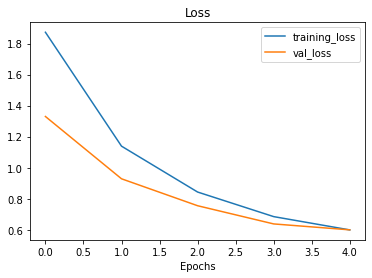

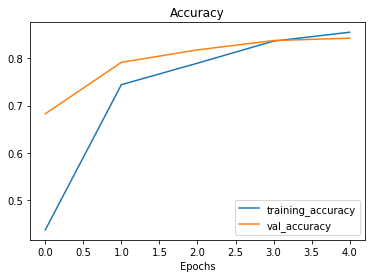

In [15]:
plot_loss_curves(history_10_percent)

###Getting a feature vector from trained model

Globale Average Pooling 2D layer

We have a tensor after our model goes through `base_model` of shape (None, 7, 7, 1280)

But then when it passes through GlobalAVeragePooling2D, it
turns into (None, 1280).

Using similar shaped tensorof (1, 4, 4, 3) and then pass it to GlobalAveragePooling2D.

In [16]:
# Define the input shape 
input_shape = (1, 4, 4, 3)

# Create random tensor
input_tensor = tf.random.normal(input_shape)
print(f"Random input tensor: \n {input_tensor} \n")

# Pass the random tensor through a global average Pooling 2D layer
global_average_pooled_tensor = tf.keras.layers.GlobalAveragePooling2D()(input_tensor)
print(f"2D global average pool random tesor:\n {global_average_pooled_tensor} \n")

# Check the shape of the different tensor
print(f"Shape of input tensor: {input_tensor.shape}")
print(f"Shape of global tensor: {global_average_pooled_tensor.shape}")

Random input tensor: 
 [[[[-1.5183539  -1.6919292  -1.8510695 ]
   [ 0.8790086   0.6789662  -0.8403638 ]
   [ 0.97364944 -1.4927415  -0.46149236]
   [-0.3429169  -1.2747006  -0.45693874]]

  [[ 0.7744506  -0.84797794 -0.3241788 ]
   [-0.29505834 -1.1675316  -2.8408601 ]
   [-0.19586594  1.2382892  -0.6052761 ]
   [-0.29215267  0.5401212  -0.3174524 ]]

  [[ 0.93263364  0.1777746   0.54901415]
   [ 3.3557615   0.3461118  -0.6437507 ]
   [ 0.6081531   0.70675373 -1.4029874 ]
   [-0.4410267  -1.5775106   1.4351034 ]]

  [[-0.63654333  0.25412428 -0.9777985 ]
   [-0.05101813 -0.11992814 -1.9036576 ]
   [-0.8574691   0.8209675   0.3209839 ]
   [ 0.02561506  0.16105843 -1.1888535 ]]]] 

2D global average pool random tesor:
 [[ 0.18242916 -0.20300953 -0.7193486 ]] 

Shape of input tensor: (1, 4, 4, 3)
Shape of global tensor: (1, 3)


In [17]:
# Let's replicate the GlobalAveragePool2D layer
tf.reduce_mean(input_tensor, axis=[1, 2])


<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[ 0.18242916, -0.20300953, -0.7193486 ]], dtype=float32)>

###Running a series of transer learning experiments

1. `model_1` - use feature extraction transfer learning with 1% of training with data augmentation

2. `model_2` - use feature extraction transfer learning with 10% of training with data augmentation

3. `model_3` - use fine-tuning transfer learning on 10% of the training data with data augmentation

4. `model_4` - use fine-tuning transfer learning on 100% of the training data with data augmentation





In [18]:
# Download and unzip data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip

unzip_data('10_food_classes_1_percent.zip')

--2021-09-29 16:38:57--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.103.128, 108.177.120.128, 108.177.121.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.103.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M   161MB/s    in 0.8s    

2021-09-29 16:38:58 (161 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [19]:
# Create training and test dir
train_dir_1_precent = '10_food_classes_1_percent/train'
test_dir = '10_food_classes_1_percent/test'

In [20]:
# How many images 
walk_through_dir('10_food_classes_10_percent/')

There are 2 directories and 0 images in '10_food_classes_10_percent/'.
There are 10 directories and 0 images in '10_food_classes_10_percent/train'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/fried_rice'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ice_cream'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/sushi'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/steak'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/hamburger'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ramen'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_wings'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/grilled_salmon'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_curry'.
There are 0 directories and 75 images in '10_food_classes_10_percen

In [21]:
# Setup dataLoaders
IMG_SIZE = (224, 224)
train_data_1_precent = tf.keras.preprocessing.image_dataset_from_directory(train_dir_1_precent,
                                                                            label_mode="categorical",
                                                                           image_size=IMG_SIZE,
                                                                           batch_size=BATCH_SIZE)

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode="categorical",
                                                                image_size=IMG_SIZE,
                                                                batch_size=BATCH_SIZE)

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


## Adding data augmentation into the model


In [22]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

data_augmentaion = keras.Sequential([
                                     preprocessing.RandomFlip('horizontal'),
                                     preprocessing.RandomRotation(0.2),
                                     preprocessing.RandomZoom(0.2),
                                     preprocessing.RandomHeight(0.2),
                                     preprocessing.RandomWidth(0.2),
                                    #  preprocessing.Rescaling(1./255)
], name='data_augmetaion')


### Visulaize our data augmentation layer


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


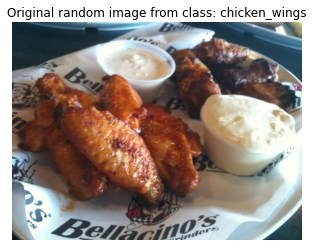

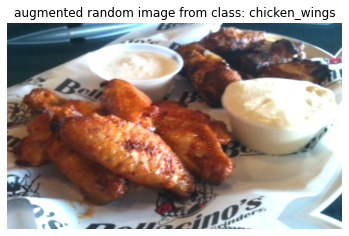

In [23]:
# view random iamge and compare it to its augmunated version
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random
target_class = random.choice(train_data_1_precent.class_names)
target_dir = '10_food_classes_1_percent/train/' + target_class
random_image = random.choice(os.listdir(target_dir))
random_image_path = target_dir + "/" + random_image

img = mpimg.imread(random_image_path)
plt.imshow(img)
plt.title(f"Original random image from class: {target_class}")
plt.axis(False);

# Plot augmented random image
augmented_img = data_augmentaion(tf.expand_dims(img, axis=0))
plt.figure()
plt.imshow(tf.squeeze(augmented_img) /225. )
plt.title(f"augmented random image from class: {target_class}")
plt.axis(False);



###Model 1: Feature extraction transfer learning on 1% of the data with data augmentation

In [24]:
input_shape = (224, 224, 3)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

inputs = layers.Input(shape=input_shape, name="input_layer")

# Add in data augmentation Sequential model as a layer
x = data_augmentaion(inputs)

# Give base_model the inputs (after augmentation) and don't train it
x = base_model(x, training=False)

# Pool output 
x = layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)

# Put a dense layer on as the output
outputs = layers.Dense(10, activation="softmax", name="output_layer")(x)

# Make a model using the inputs and outputs
model_1 = keras.Model(inputs, outputs)

model_1.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

history_1_precent = model_1.fit(train_data_1_precent,
                                epochs=5,
                                steps_per_epoch=len(train_data_1_precent),
                                validation_data=test_data,
                                validation_steps=int(0.25 * len(test_data)),
                                callbacks=[create_tensorboard_callback("transfer_learning",
                                                                       "1_precent_data_aug")])

Saving TensorBoard log files to: transfer_learning/1_precent_data_aug/20210929-163904
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


3/3 [==============================] - 15s 3s/step - loss: 2.3647 - accuracy: 0.1143 - val_loss: 2.3648 - val_accuracy: 0.1102
Epoch 2/5
3/3 [==============================] - 5s 2s/step - loss: 2.1284 - accuracy: 0.2286 - val_loss: 2.2421 - val_accuracy: 0.1957
Epoch 3/5
3/3 [==============================] - 4s 2s/step - loss: 1.9094 - accuracy: 0.4286 - val_loss: 2.1406 - val_accuracy: 0.2401
Epoch 4/5
3/3 [==============================] - 4s 2s/step - loss: 1.7778 - accuracy: 0.5714 - val_loss: 2.0417 - val_accuracy: 0.3059
Epoch 5/5
3/3 [==============================] - 5s 2s/step - loss: 1.6756 - accuracy: 0.6857 - val_loss: 1.9424 - val_accuracy: 0.3668


In [25]:
model_1.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 224, 224, 3)]     0         
_________________________________________________________________
data_augmetaion (Sequential) (None, None, None, 3)     0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, None, None, 1280)  4049571   
_________________________________________________________________
global_average_pooling_layer (None, 1280)              0         
_________________________________________________________________
output_layer (Dense)         (None, 10)                12810     
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


In [26]:
results_1_percent_data_aug = model_1.evaluate(test_data)
results_1_percent_data_aug 

79/79 [==============================] - 11s 131ms/step - loss: 1.9284 - accuracy: 0.3788


[1.928422212600708, 0.37880000472068787]

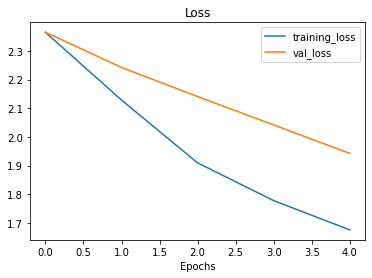

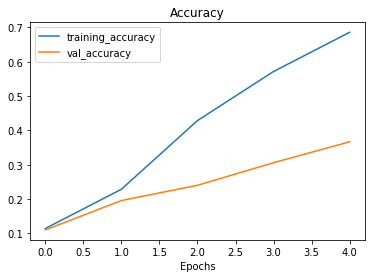

In [27]:
plot_loss_curves(history_1_precent)

In [28]:
# video 13 done

###Model 2: feature extraction transfer learning model with  10% of data and data augmentaion

In [30]:
# Get 10 precent of the data 
train_dir_10_precent = '10_food_classes_10_percent/train'
test_dir_10_precent = '10_food_classes_10_percent/test'

In [31]:
# Setup data inputs
import tensorflow as tf
IMG_SIZE = (224, 224)
train_data_10_precent = tf.keras.preprocessing.image_dataset_from_directory(train_dir_10_precent,
                                                                            label_mode='categorical',
                                                                            image_size=IMG_SIZE)

test_data_10_precent = tf.keras.preprocessing.image_dataset_from_directory(test_dir_10_precent,
                                                                            label_mode='categorical',
                                                                            image_size=IMG_SIZE)            

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [35]:
# Create model 2 with data augmetation bulit in
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential


# Build data augmentation layer
data_augmentaion = Sequential([
                               preprocessing.RandomFlip('horizontal'),
                               preprocessing.RandomHeight(0.2),
                               preprocessing.RandomWidth(0.2),
                               preprocessing.RandomZoom(0.2),
                               preprocessing.RandomRotation(0.2)
], name='data_augmentation')

# Setup the input shape to our model
input_shape = (224, 224, 3)

# Create a frozen base model (also called the backbone)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

# create the inputs and outputs (including the layers in between)
inputs = layers.Input(shape=input_shape, name='input_layer')
x = data_augmentaion(inputs)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D(name='global_average_pooling_2D')(x)
outputs = layers.Dense(10, activation='softmax', name='output_layer')(x)
model_2 = tf.keras.Model(inputs, outputs)

model_2.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])


**Note:** in functional api if its model it is take the argument inside `base_model(x)` , and if its a layer it is take the argument outside `GlobalAveragePooling2D()(x)`

In [37]:
model_2.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 224, 224, 3)]     0         
_________________________________________________________________
data_augmentation (Sequentia (None, None, None, 3)     0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, None, None, 1280)  4049571   
_________________________________________________________________
global_average_pooling_2D (G (None, 1280)              0         
_________________________________________________________________
output_layer (Dense)         (None, 10)                12810     
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


###Creating a ModelCheckpoint callback

In [39]:
checkpoint_path = 'ten_precent_model_checkpoints/checkpoint'

#Create ModelCeckpoint callback that saves the model's weights only
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=True,
                                                         save_best_only=False,
                                                         save_freq="epoch",
                                                         verbose=1)

In [40]:
# Fit model 2
initial_epochs = 5
history_10_percent_data_aug = model_2.fit(train_data_10_precent,
                                          epochs=initial_epochs,
                                          validation_data=test_data,
                                          validation_steps=int(0.25 * len(test_data)),
                                          callbacks=[create_tensorboard_callback(dir_name="transfer_learning",
                                                                                 experiment_name="10_precent_data_aug"),
                                                     checkpoint_callback])

Saving TensorBoard log files to: transfer_learning/10_precent_data_aug/20210929-173159
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


24/24 [==============================] - 26s 790ms/step - loss: 2.0113 - accuracy: 0.3400 - val_loss: 1.4999 - val_accuracy: 0.6118

Epoch 00001: saving model to ten_precent_model_checkpoints/checkpoint
Epoch 2/5
24/24 [==============================] - 14s 582ms/step - loss: 1.3644 - accuracy: 0.6627 - val_loss: 1.0982 - val_accuracy: 0.7368

Epoch 00002: saving model to ten_precent_model_checkpoints/checkpoint
Epoch 3/5
24/24 [==============================] - 16s 658ms/step - loss: 1.0494 - accuracy: 0.7493 - val_loss: 0.8798 - val_accuracy: 0.7812

Epoch 00003: saving model to ten_precent_model_checkpoints/checkpoint
Epoch 4/5
24/24 [==============================] - 14s 560ms/step - loss: 0.8994 - accuracy: 0.7827 - val_loss: 0.7684 - val_accuracy: 0.8059

Epoch 00004: saving model to ten_precent_model_checkpoints/checkpoint
Epoch 5/5
24/24 [==============================] - 14s 569ms/step - loss: 0.7840 - accuracy: 0.8040 - val_loss: 0.7271 - val_accuracy: 0.7944

Epoch 00005: sa

In [43]:
# What were model_0 results?
model_0.evaluate(test_data)

79/79 [==============================] - 11s 131ms/step - loss: 0.6043 - accuracy: 0.8440


[0.6042889356613159, 0.843999981880188]

In [44]:
# Check model_2 results on all test_data
result_10_percent_data_aug = model_2.evaluate(test_data)
result_10_percent_data_aug 

79/79 [==============================] - 11s 132ms/step - loss: 0.6957 - accuracy: 0.8140


[0.6957154870033264, 0.8140000104904175]

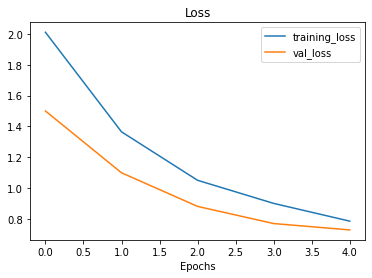

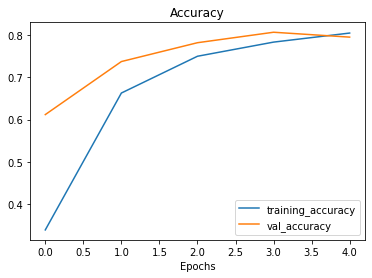

In [45]:
plot_loss_curves(history_10_percent_data_aug)

###Loading in checkpoints weights

Loading in checkpoints weights retruns a model specific checkpoints

In [46]:
# Load in saved in model weights and evalute model
model_2.load_weights(checkpoint_path)

In [47]:
# Evalaute model_2 with loaded weights
loaded_weights_model_result = model_2.evaluate(test_data)

79/79 [==============================] - 11s 131ms/step - loss: 0.6957 - accuracy: 0.8140


In [48]:
# if the results from our previously evaluated model_2 match 
result_10_percent_data_aug == loaded_weights_model_result

True

In [51]:
# check to see if loeaded model result are very close to previous non-loaded model
import numpy as np
np.isclose(np.array(result_10_percent_data_aug), np.array(loaded_weights_model_result))

array([ True,  True])

In [52]:
# Check the difference between the two results
print(np.array(result_10_percent_data_aug) - np.array(loaded_weights_model_result))

[0. 0.]


###Model 3: Fine-tuing an existing model on 10% of the data

**NOTE:** Fine-tuning works best after training a feature extraction model for a few epochs with large amount of custom data.

In [55]:
model_2.layers

In [56]:
# Are these layers trainable?
for layer in model_2.layers:
  print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7fb6b2be93d0> True
<keras.engine.sequential.Sequential object at 0x7fb6b2bcd890> True
<keras.engine.functional.Functional object at 0x7fb6b3659250> False
<keras.layers.pooling.GlobalAveragePooling2D object at 0x7fb6b2bcd390> True
<keras.layers.core.Dense object at 0x7fb6b35b0b10> True


In [60]:
# What layers are in our base_model?
for i, layer in enumerate(model_2.layers[2].layers):
  print(i, layer.name, layer.trainable)

0 input_5 False
1 rescaling_4 False
2 normalization_4 False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_resha

In [62]:
# How many trianable varibales are in our base model?
print(len(model_2.layers[2].trainable_variables))

0


In [63]:
# To begin fine-tuning, let's start by setting the last 10 layers of our base_model.trainable = True
base_model.trainable = True

# Freeze all layers except for the last 10
for layer in base_model.layers[:-10]:
  layer.trainable = False

# Recompile (we have to recompile our models every time we make a change)
model_2.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), # when fine-tuning lower the learning rate by 10X
                metrics=['accuracy'])


In [64]:
# Check which layers are tunable (trainable)
for layer_number, layer in enumerate(model_2.layers[2].layers):
  print(layer_number, layer.name, layer.trainable)

0 input_5 False
1 rescaling_4 False
2 normalization_4 False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_resha

In [65]:
# How many trainabel variables are there?
print(len(model_2.trainable_variables))

12


In [67]:
# Fine tune for another 5 epochs
fine_tune_epochs = initial_epochs + 5

# Refit the model (same as model_2 except wiht more trainable layers ) 
history_fine_10_percent_data_aug = model_2.fit(train_data_10_precent,
                                               epochs=fine_tune_epochs,
                                               validation_data=test_data,
                                               validation_steps=int(0.25 * len(test_data)),
                                               initial_epoch=history_10_percent_data_aug.epoch[-1], # start training from previous last epoch
                                               callbacks=[create_tensorboard_callback("transfer_learning",
                                                                                      "10_percent_fine_tune_last_10")])


Saving TensorBoard log files to: transfer_learning/10_percent_fine_tune_last_10/20210929-183451
Epoch 5/10


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


24/24 [==============================] - 26s 708ms/step - loss: 0.6981 - accuracy: 0.8173 - val_loss: 0.6215 - val_accuracy: 0.8043
Epoch 6/10
24/24 [==============================] - 12s 490ms/step - loss: 0.5791 - accuracy: 0.8400 - val_loss: 0.5533 - val_accuracy: 0.8240
Epoch 7/10
24/24 [==============================] - 15s 596ms/step - loss: 0.5028 - accuracy: 0.8387 - val_loss: 0.5175 - val_accuracy: 0.8306
Epoch 8/10
24/24 [==============================] - 12s 472ms/step - loss: 0.4448 - accuracy: 0.8680 - val_loss: 0.5345 - val_accuracy: 0.8092
Epoch 9/10
24/24 [==============================] - 12s 464ms/step - loss: 0.4021 - accuracy: 0.8680 - val_loss: 0.5117 - val_accuracy: 0.8158
Epoch 10/10
24/24 [==============================] - 12s 486ms/step - loss: 0.3651 - accuracy: 0.8840 - val_loss: 0.5324 - val_accuracy: 0.8158


In [68]:
# Evaluate the fine-tuned model (model_3 which is actualy model_2 fine-tuned for another 5 epochs)
result_fine_tune10_percent = model_2.evaluate(test_data)

79/79 [==============================] - 11s 131ms/step - loss: 0.4948 - accuracy: 0.8384


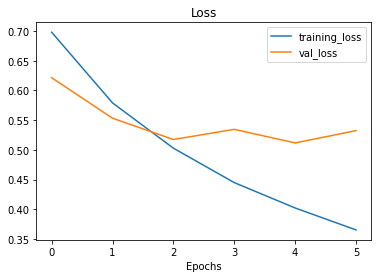

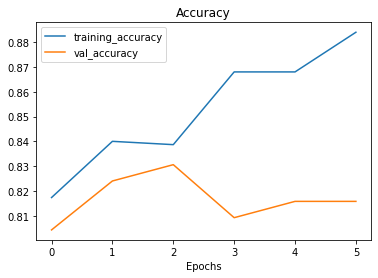

In [70]:
plot_loss_curves(history_fine_10_percent_data_aug)

The `plot_loss_curves` function works great with models which have only been fit once, however, we want something to compare one series of running `fit()` with another (e.g. before and after fine-tunning)

In [75]:
def compare_historys(original_history, new_history, initial_epochs=5):
  """
  Compares two Tensorflow History objects.
  """
  # Get original history measurements
  acc = original_history.history['accuracy']
  loss = original_history.history['loss']

  val_acc = original_history.history['val_accuracy']
  val_loss = original_history.history['val_loss']

  # Combine original history metrics with new_history metrics
  total_acc = acc + new_history.history['accuracy']
  total_loss = loss + new_history.history['loss']

  total_val_acc = val_acc + new_history.history['val_accuracy']
  total_val_loss = val_loss + new_history.history['val_loss']

  # Make plots for accuracy
  plt.figure(figsize=(8, 8))
  plt.subplot(2, 1, 1)
  plt.plot(total_acc, label='Training Accuracy')
  plt.plot(total_val_acc, label='Validation Accuracy')
  plt.plot([initial_epochs-1, initial_epochs-1], plt.ylim(), label='Start Fine Tuning')
  plt.legend(loc='lower right')
  plt.title('Training and Validation Accuracy')


  # Make plots for loss
  plt.figure(figsize=(8, 8))
  plt.subplot(2, 1, 2)
  plt.plot(total_loss, label='Training Loss')
  plt.plot(total_val_loss, label='Validation Loss')
  plt.plot([initial_epochs-1, initial_epochs-1], plt.ylim(), label='Start Fine Tuning')
  plt.legend(loc='upper right')
  plt.title('Training and Validation Loss')


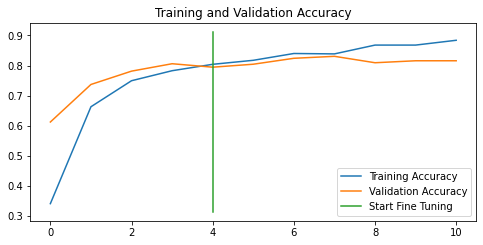

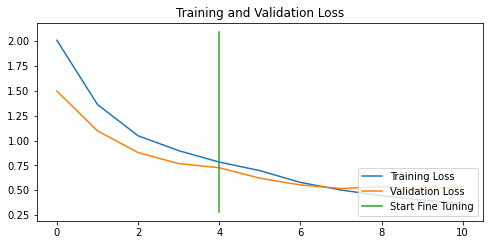

In [74]:
 compare_historys(history_10_percent_data_aug,
                 history_fine_10_percent_data_aug,
                 initial_epochs=5)

###Model 4: Fine-tuning and existing model on all of the data

In [76]:
# Download and unzip 10 classes of Food101 data with all images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
unzip_data('10_food_classes_all_data.zip')


--2021-09-29 19:01:52--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.125.128, 142.250.136.128, 142.250.148.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.125.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   180MB/s    in 2.7s    

2021-09-29 19:01:54 (180 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [78]:
# Setup training and test dir
train_dir_all_data = '10_food_classes_all_data/train'
test_dir = '10_food_classes_all_data/test'

In [79]:
# How many images 
walk_through_dir('10_food_classes_all_data/') 

There are 2 directories and 0 images in '10_food_classes_all_data/'.
There are 10 directories and 0 images in '10_food_classes_all_data/train'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'

In [81]:
# Setup data input
import tensorflow as tf

IMG_SIZE = (224, 224)

train_data_10_classes_full = tf.keras.preprocessing.image_dataset_from_directory(train_dir_all_data,
                                                                                    label_mode='categorical',
                                                                                    image_size=IMG_SIZE)
test_data =  tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode='categorical',
                                                                image_size=IMG_SIZE)


Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [84]:
# Evaluate model 2 (this is the fine-tuned on 10 percent of data version)
model_2.evaluate(test_data)

79/79 [==============================] - 11s 131ms/step - loss: 0.4948 - accuracy: 0.8384


[0.49477699398994446, 0.8384000062942505]

In [86]:
result_fine_tune10_percent

[0.4947769045829773, 0.8384000062942505]

To train a fine-tuning model (model 4) we need to revert model_2 back to its feature extraction weights.


In [87]:
# Load model from checkpoint, that way we can fine-tune from the same stage the 10 percent data model was fine-tuned from
model_2.load_weights(checkpoint_path)

In [88]:
# Let's evaluate model_2 now
model_2.evaluate(test_data)

79/79 [==============================] - 11s 131ms/step - loss: 0.6957 - accuracy: 0.8140


[0.6957155466079712, 0.8140000104904175]

In [89]:
# Check to see to if our model_2 has been reverted back to feature extraction result
result_10_percent_data_aug

[0.6957154870033264, 0.8140000104904175]

In [90]:
# which layers are tunable in the whole model
for layer_number, layer in enumerate(model_2.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_layer True
1 data_augmentation True
2 efficientnetb0 True
3 global_average_pooling_2D True
4 output_layer True


In [93]:
# what layer are trainable in base_model 
for layer_number, layer in enumerate(model_2.layers[2].layers):
  print(layer_number, layer.name, layer.trainable)

0 input_5 False
1 rescaling_4 False
2 normalization_4 False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_resha

In [98]:
model_2.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics=['accuracy'])

In [99]:
# Continue to train and fine-tune the model to our data(100% of training data)
fine_tune_epochs = initial_epochs + 5

history_fine_10_classes_full = model_2.fit(train_data_10_classes_full,
                                           epochs=fine_tune_epochs,
                                           validation_data=test_data,
                                           validation_steps=int(0.25 * len(test_data)),
                                           initial_epoch=history_10_percent_data_aug.epoch[-1],
                                           callbacks=[create_tensorboard_callback('transfer_learning',
                                                                                  'full_10_classes_fine_tune_last_10')])


Saving TensorBoard log files to: transfer_learning/full_10_classes_fine_tune_last_10/20210929-195343
Epoch 5/10


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


235/235 [==============================] - 69s 261ms/step - loss: 0.7519 - accuracy: 0.7555 - val_loss: 0.3610 - val_accuracy: 0.8816
Epoch 6/10
235/235 [==============================] - 82s 348ms/step - loss: 0.5878 - accuracy: 0.8087 - val_loss: 0.3389 - val_accuracy: 0.8914
Epoch 7/10
235/235 [==============================] - 71s 302ms/step - loss: 0.5331 - accuracy: 0.8281 - val_loss: 0.2906 - val_accuracy: 0.9079
Epoch 8/10
235/235 [==============================] - 66s 281ms/step - loss: 0.4802 - accuracy: 0.8448 - val_loss: 0.3003 - val_accuracy: 0.8980
Epoch 9/10
235/235 [==============================] - 67s 285ms/step - loss: 0.4497 - accuracy: 0.8571 - val_loss: 0.2751 - val_accuracy: 0.9095
Epoch 10/10
235/235 [==============================] - 65s 274ms/step - loss: 0.4162 - accuracy: 0.8636 - val_loss: 0.2871 - val_accuracy: 0.9062


In [100]:
# Evaluate on all of the test data
results_fine_tune_full_data = model_2.evaluate(test_data)
results_fine_tune_full_data 

79/79 [==============================] - 11s 130ms/step - loss: 0.3129 - accuracy: 0.9016


[0.31290286779403687, 0.9016000032424927]

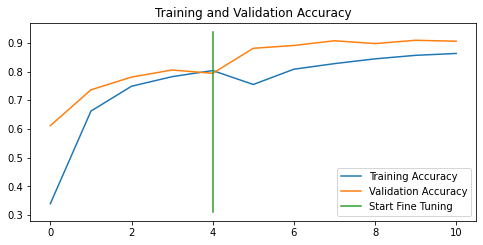

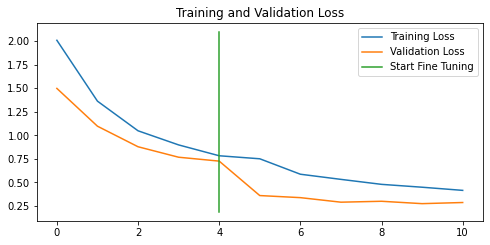

In [101]:
# How did fine-tuning go with more data?
compare_historys(original_history=history_10_percent_data_aug,
                 new_history=history_fine_10_classes_full,
                 initial_epochs=5)

###Viewing our experiment data on TensorBoard

In [ ]:
# View tensorboard ogs of transfer  learning modelling experiments (should ~4 models)
!tensorboard dev upload --logdir transfer_learning/ \
  --name "Transfer Learning Experiments with 10 Food101 Classes" \
  --description "A series of different transfer learning experiments with varying amount of data and fine-tuning" \
  --one_shot

##TensorBoard Link

 https://tensorboard.dev/experiment/sjpCNCnGT2illZ2ovIpXUQ/#scalars

In [104]:
model_2.save('drive/MyDrive/Tensorflow-data-course/model_from_05transfer_learing')

INFO:tensorflow:Assets written to: drive/MyDrive/Tensorflow-data-course/model_from_05transfer_learing/assets


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [106]:
# To delete a experiment
# !tensorboard dev delete --experiment_id sjpCNCnGT2illZ2ovIpXUQ